In [273]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
# 데이터 나누기
train = pd.read_csv('./Data/서울CGV.csv').set_index('CGV')
test_busan = pd.read_csv('./Data/부산CGV.csv')
test_daegu = pd.read_csv('./Data/대구CGV.csv')
train = pd.DataFrame(train).dropna(axis=0, how='all').dropna(axis=1)
busan = pd.DataFrame(test_busan).dropna(axis=0, how='all').dropna(axis=1)
daegu = pd.DataFrame(test_daegu).dropna(axis=0, how='all').dropna(axis=1)
test = pd.concat([busan, daegu]).set_index('후보')

trainX = train[:25].drop('상영관수', axis=1)
trainY = train.상영관수[:25]
ValidateX = train[25:].drop('상영관수', axis=1)
ValidateY = train.상영관수[25:]

In [275]:
# plot을 위해 columns 명 바꿔주기
trainX.columns = (['GRDP', 'people', 'Avg of GRDP', "10's", "20's", "30's", "40's", 'density', 'starbucks', 'Mac', 'Subway', 'Bus stop', 'Museum', 'Art', 'Sport'])
ValidateX.columns = (['GRDP', 'people', 'Avg of GRDP', "10's", "20's", "30's", "40's", 'density', 'starbucks', 'Mac', 'Subway', 'Bus stop', 'Museum', 'Art', 'Sport'])

In [276]:
# 전체 데이터를 활용하여 선형회귀 적용
reg = LinearRegression()
reg.fit(trainX, trainY)

LinearRegression()

In [277]:
# R2 값 계산
reg.score(ValidateX, ValidateY)

0.5287216471912155

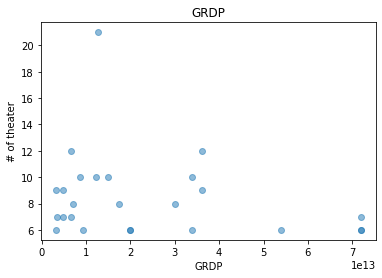

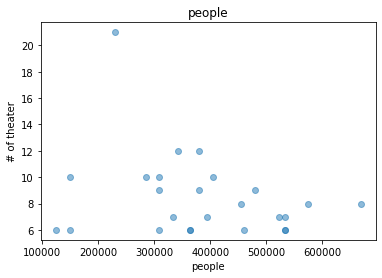

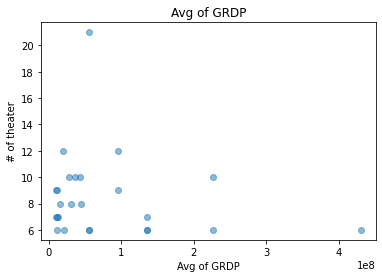

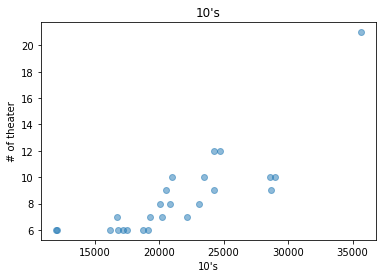

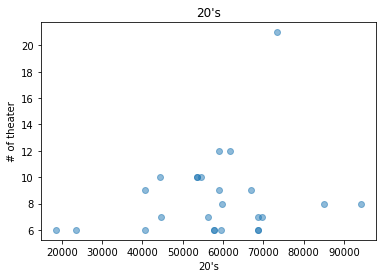

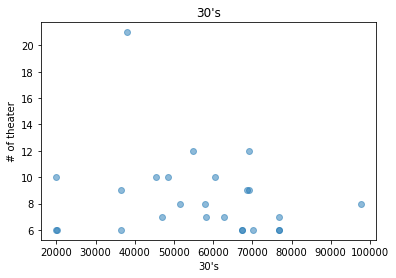

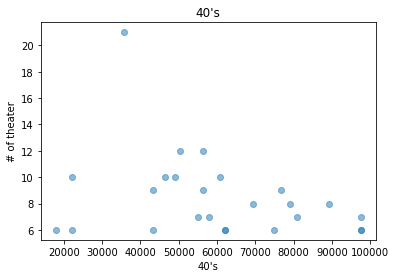

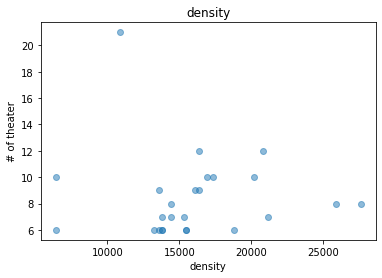

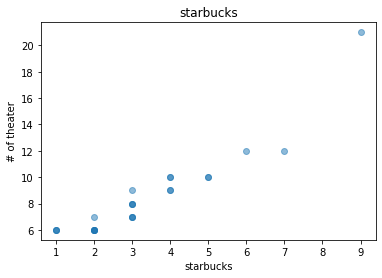

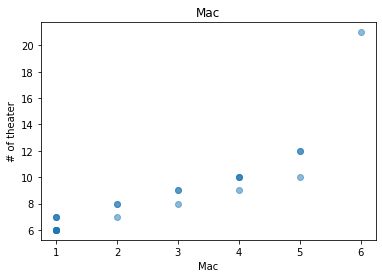

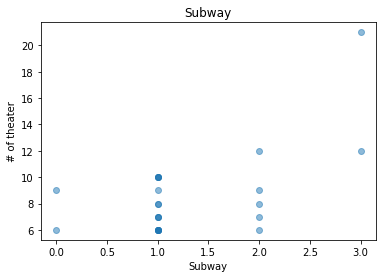

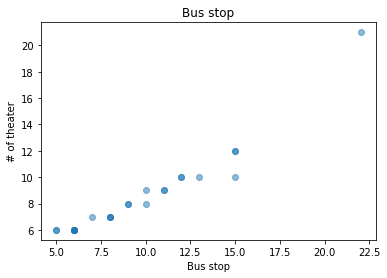

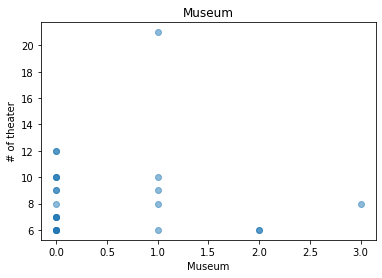

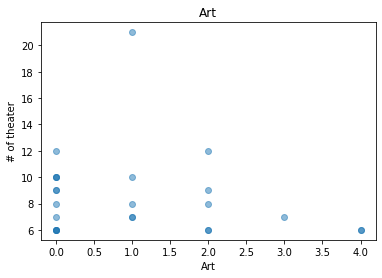

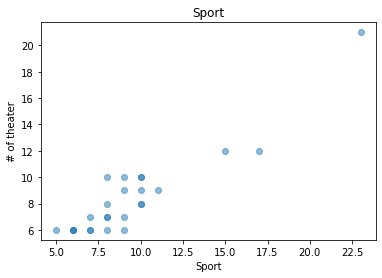

In [278]:
# 상영관의 개수 vs 설명 변수
variable_eng = ['GRDP', 'people', 'Avg of GRDP', "10's", "20's", "30's", "40's", 'density', 'starbucks', 'Mac', 'Subway', 'Bus stop', 'Museum', 'Art', 'Sport']
for i in range(len(variable_eng)):
    X = trainX[variable_eng[i]]
    Y = trainY
    plt.scatter(X, Y, alpha=0.5)
    plt.title(variable_eng[i])
    plt.xlabel(variable_eng[i])
    plt.ylabel('# of theater')
    plt.show()

<AxesSubplot:>

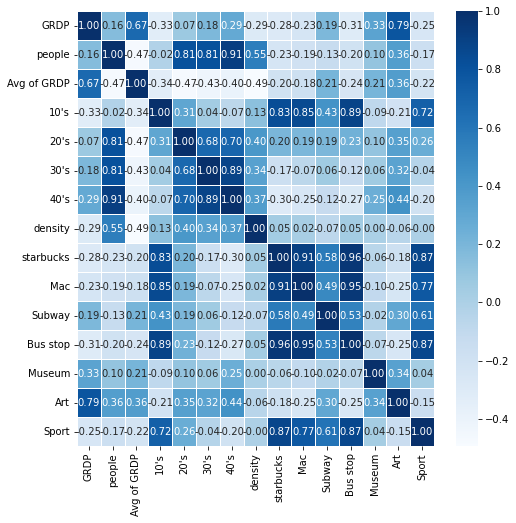

In [279]:
# 상관관계 확인하기
plt.figure(figsize=(8,8))
sns.heatmap(data = trainX.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [280]:
# 상관계수가 다른 변수와 높고, 선형적인 관계를 가지지 않는 변수 제거
trainX = trainX.drop(['GRDP', 'people'], axis=1)
ValidateX = ValidateX.drop(['GRDP', 'people'], axis=1)


In [281]:
# 새로운 LinearRegression 정의
reg2 = LinearRegression()
reg2.fit(trainX, trainY)
reg2.score(ValidateX, ValidateY)

0.870757518050242

In [285]:
# coef 확인
variable = ['평균 지역내총생산', '10대 인구수', '20대 인구수', '30대 인구수', '40대 인구수', '인구밀도', '스타벅스', '맥도날드', '지하철역', '버스정류장', '박물관', '미술관', '체육시설']

for i in range(len(reg2.coef_)):
    print(f'{variable[i]}: {round((reg2.coef_[i]), 6)}')

평균 지역내총생산: -0.0
10대 인구수: 4.3e-05
20대 인구수: 2.1e-05
30대 인구수: -8e-06
40대 인구수: -1.8e-05
인구밀도: -5.4e-05
스타벅스: 0.032827
맥도날드: -0.533266
지하철역: 0.087819
버스정류장: 0.64757
박물관: 0.170349
미술관: 0.125639
체육시설: 0.239064


In [283]:
# test 데이터 전처리
test.columns = (['GRDP', 'people', 'Avg of GRDP', "10's", "20's", "30's", "40's", 'density', 'starbucks', 'Mac', 'Subway', 'Bus stop', 'Museum', 'Art', 'Sport'])
test = test.drop(['GRDP', 'people'], axis=1)

In [284]:
#test

y_pred = reg2.predict(test)

candi = ['부산대역', '부산역', '사상역', '동대신역', '수영역', '동대구역', '두류역', '대명역', '대실역']
for i in range(len(candi)):
    print(f'{candi[i]}: {round(y_pred[i])}')

부산대역: 10
부산역: 5
사상역: 4
동대신역: 11
수영역: 9
동대구역: 7
두류역: 3
대명역: 3
대실역: 10
